Reconhecimento de Padrões

Lista 1: Regressão Linear

Vinícius Peixoto Chagas

# Imports

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [225]:
df = pd.read_csv("content/artificial1d.csv")
df.columns = ['x', 'y']
df.head()

,x,y
0,-0.931034,-1.326980
1,-0.862069,-1.105598
2,-0.793103,-0.873946
3,-0.724138,-0.285027
4,-0.655172,-0.431153


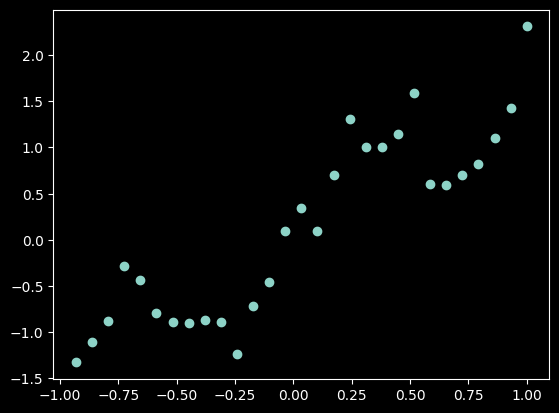

In [226]:
plt.scatter(df['x'], df['y'])
plt.show()

# Models

## Gradient Descent

In [227]:
class GradientDescent:
    def __init__(self, alpha=0.1, epochs=10):
        self.alpha = alpha
        self.epochs = epochs
        self.w0 = 0
        self.w1 = 0

    def fit(self, x, y, plot=False):
        error_list = []
        error_list_x = []
        for epoch in range(self.epochs):
            for i in range(len(x)):
                y_hat = self.w0 + self.w1 * x[i]
                error_list.append(y[i] - y_hat)
                error_list_x.append((y[i] - y_hat) * x[i])
            self.w0 = self.w0 + self.alpha * 1 / len(x) * sum(error_list)
            self.w1 = self.w1 + self.alpha * 1 / len(x) * sum(error_list_x)

            if plot:
                plot_x = [x.min(), x.max()]
                plot_y = [self.w0 + self.w1 * x for x in plot_x]
                plt.plot(plot_x, plot_y)
                plt.scatter(df["x"], df["y"])
                plt.show()
        return self.w0, self.w1

    def predict(self, x):
        return self.w0 + self.w1 * x

In [228]:
GD = GradientDescent()

In [229]:
GD.fit(df['x'], df['y'])
GD_pred = GD.predict(df['x'])

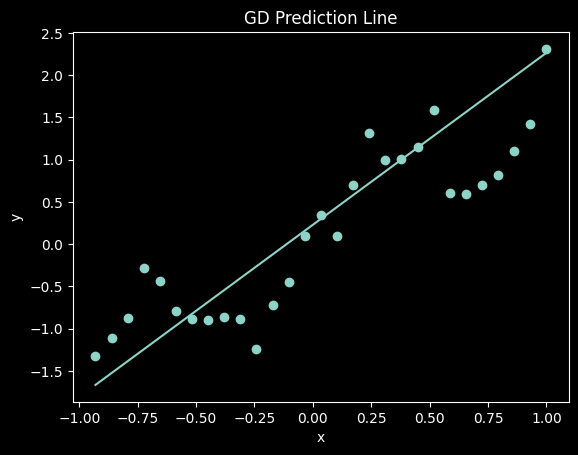

In [230]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], GD_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('GD Prediction Line')
plt.show()

## Stochastic Gradient Descent

In [231]:
class StochasticGradientDescent:
    def __init__(self, alpha=0.1, epochs=10):
        self.alpha = alpha
        self.epochs = epochs
        self.w0 = 0
        self.w1 = 0

    def fit(self, x, y, plot=False):
        for epoch in range(self.epochs):
            for i in range(len(df)):

                y_hat = self.w0 + self.w1 * x[i]
                error = y[i] - y_hat

                self.w0 = self.w0 + self.alpha * error
                self.w1 = self.w1 + self.alpha * error * x[i]

            if plot:
                plot_x = [x.min(), x.max()]
                plot_y = [self.w0 + self.w1 * x for x in plot_x]
                plt.plot(plot_x, plot_y)
                plt.scatter(x, y)
                plt.show()
        return self.w0, self.w1

    def predict(self, x):
        return self.w0 + self.w1 * x

In [232]:
SGD = StochasticGradientDescent()

In [233]:
SGD.fit(df['x'], df['y'])

(np.float64(0.07887023786861341), np.float64(1.577197367319598))

In [234]:
sgd_pred = SGD.predict(df['x'])

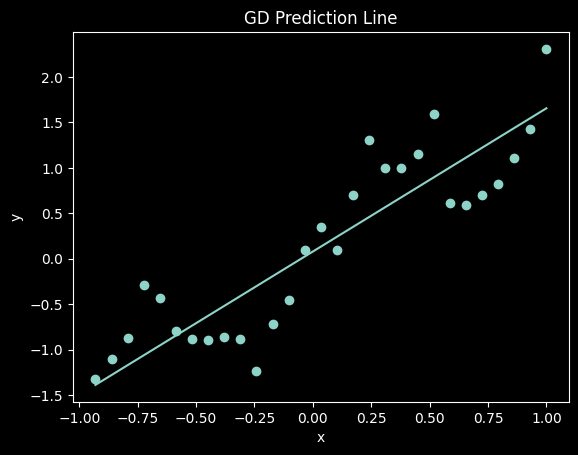

In [235]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], sgd_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('GD Prediction Line')
plt.show()

## Ordinary Least Squares

In [236]:
class OrdinaryLeastSquares:
    def __init__(self):
        self.w = []

    def fit(self, x, y):
        x = x.to_frame()
        x.insert(0, "x0", 1)
        x = x.values
        y = y.values

        squares_inv = np.linalg.inv(x.T @ x)
        self.w = squares_inv @ x.T @ y

        return self.w

    def predict(self, x):
        x = x.to_frame()
        x.insert(0, "x0", 1)
        x = x.values

        return x @ self.w

In [237]:
OLS = OrdinaryLeastSquares()

In [238]:
OLS.fit(df['x'], df['y'])

array([0.08956111, 1.51328267])

In [239]:
ols_pred = OLS.predict(df['x'])

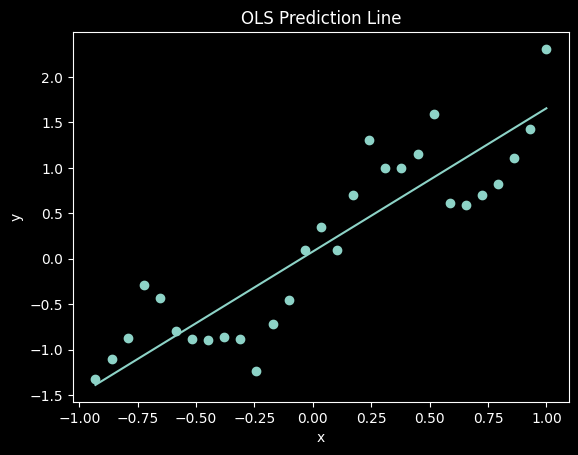

In [240]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], sgd_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('OLS Prediction Line')
plt.show()

# Plot Gifs

In [241]:
# GD.fit(df['x'], df['y'], plot = True)

In [242]:
# SGD.fit(df['x'], df['y'], plot = True)